<a href="https://colab.research.google.com/github/rhiats/Heart-Failure-Clinical-Records/blob/main/Heart_Failure_Clinical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Failure Clinical Records**

Replicate paper:

Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making, 20, 16. https://doi.org/10.1186/s12911-020-1023-5

Dataset:
Heart Failure Clinical Records [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd

**Load Data from UCI ML Repo**

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

In [4]:
df = pd.concat([X, y], axis=1)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Continuous Features EDA**

In [5]:
continuous_features_df = X[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
summary_continuous_full_sample_df = pd.DataFrame({
    'Median': continuous_features_df.median(),
    'Mean': round(continuous_features_df.mean(),2),
    'Standard Deviation': round(continuous_features_df.std(),2)
})

In [6]:
summary_continuous_full_sample_df

,Median,Mean,Standard Deviation
age,60.0,60.83,11.89
creatinine_phosphokinase,250.0,581.84,970.29
ejection_fraction,38.0,38.08,11.83
platelets,262000.0,263358.03,97804.24
serum_creatinine,1.1,1.39,1.03
serum_sodium,137.0,136.63,4.41
time,115.0,130.26,77.61


In [7]:
continuous_features_dead_df = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']][df['death_event']==1]

In [8]:
summary_continuous_dead_df = pd.DataFrame({
    'Median': continuous_features_dead_df.median(),
    'Mean': round(continuous_features_dead_df.mean(),2),
    'Standard Deviation': round(continuous_features_dead_df.std(),2)
})

In [9]:
summary_continuous_dead_df

,Median,Mean,Standard Deviation
age,65.0,65.22,13.21
creatinine_phosphokinase,259.0,670.20,1316.58
ejection_fraction,30.0,33.47,12.53
platelets,258500.0,256381.04,98525.68
serum_creatinine,1.3,1.84,1.47
serum_sodium,135.5,135.38,5.00
time,44.5,70.89,62.38


In [10]:
continuous_features_survived_df = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']][df['death_event']==0]

In [11]:
summary_continuous_survived_df = pd.DataFrame({
    'Median': continuous_features_survived_df.median(),
    'Mean': round(continuous_features_survived_df.mean(),2),
    'Standard Deviation': round(continuous_features_survived_df.std(),2)
})

In [12]:
summary_continuous_survived_df

,Median,Mean,Standard Deviation
age,60.0,58.76,10.64
creatinine_phosphokinase,245.0,540.05,753.80
ejection_fraction,38.0,40.27,10.86
platelets,263000.0,266657.49,97531.20
serum_creatinine,1.0,1.18,0.65
serum_sodium,137.0,137.22,3.98
time,172.0,158.34,67.74


In [13]:
'Full sample: {} individuals. Dead patients: {} individuals. Survived patients: {} individuals. σ: standard deviation'.format(len(df), len(continuous_features_dead_df), len(continuous_features_survived_df))

'Full sample: 299 individuals. Dead patients: 96 individuals. Survived patients: 203 individuals. σ: standard deviation'

**Categorical Features EDA**

- 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'

In [14]:
def categorical_features_eda(df, feature):
  """
    Count the number of events and non-events in a categroical feature and calculate the percentage of events and non-events.

    @param df: DataFrame contraining the feature
    @param feature: string feature name
    @return: DataFrame with the number of events and non-events and the percentage of events and non-events
  """
  calc_df = df[[feature,'age']].groupby(feature).count().reset_index().rename(columns={'age':'#'})
  calc_df['%']=round((calc_df['#']/calc_df['#'].sum())*100,2)

  print(calc_df)

In [15]:
categorical_features_list = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for feature in categorical_features_list:
  categorical_features_eda(df, feature)

   anaemia    #      %
0        0  170  56.86
1        1  129  43.14
   diabetes    #      %
0         0  174  58.19
1         1  125  41.81
   high_blood_pressure    #      %
0                    0  194  64.88
1                    1  105  35.12
   sex    #      %
0    0  105  35.12
1    1  194  64.88
   smoking    #      %
0        0  203  67.89
1        1   96  32.11


**Mann–Whitney U test**

In [16]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df, feature):
  """
    Perform a Mann–Whitney U test on a continuous feature.

    @param df: DataFrame contraining the feature
    @param feature: string feature name
    @return: DataFrame with the Mann–Whitney U test results
  """

  # Example data: feature values for two groups (e.g., survived vs died)
  group_survived = df[df['death_event']==0][feature]
  group_died = df[df['death_event']==1][feature]

  # Perform Mann–Whitney U test
  stat, p_value = mannwhitneyu(group_survived, group_died, alternative='two-sided')

  #print(f"U statistic: {stat}")
  print(f"P-value: {p_value}")

  if p_value < 0.05:
      print("Reject the null hypothesis. There is a significant difference between the groups.")
  else:
      print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


In [17]:
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for feature in continuous_features:
  print(feature)
  mann_whitney_u_test(df, feature)
  print("\n")

age
P-value: 0.0001667518011391951
Reject the null hypothesis. There is a significant difference between the groups.


creatinine_phosphokinase
P-value: 0.6840400261440358
Fail to reject the null hypothesis. There is no significant difference between the groups.


ejection_fraction
P-value: 7.368249168477738e-07
Reject the null hypothesis. There is a significant difference between the groups.


platelets
P-value: 0.4255585098046608
Fail to reject the null hypothesis. There is no significant difference between the groups.


serum_creatinine
P-value: 1.5809979011834038e-10
Reject the null hypothesis. There is a significant difference between the groups.


serum_sodium
P-value: 0.00029275574637774727
Reject the null hypothesis. There is a significant difference between the groups.


time
P-value: 6.85219665413428e-21
Reject the null hypothesis. There is a significant difference between the groups.




**Pearson correlation coefficient**

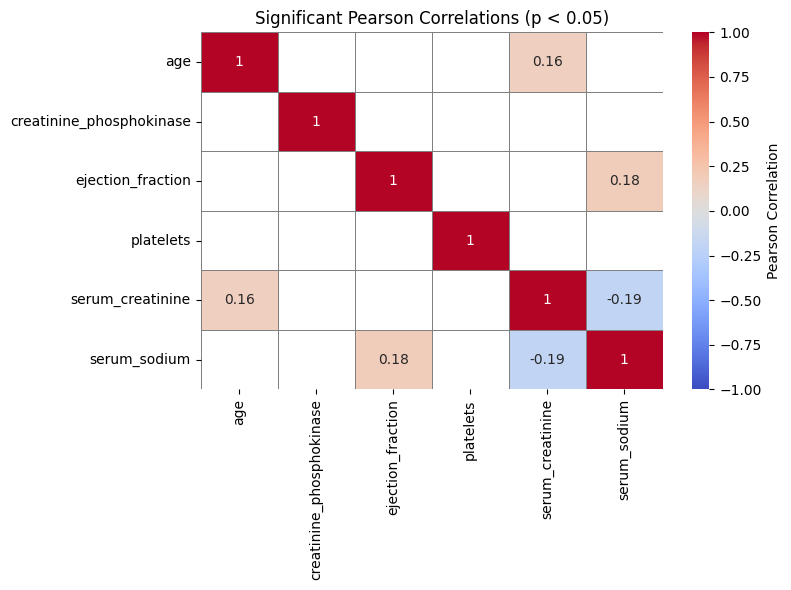

In [22]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

def corr_with_pvalues(df):
    cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
    corr_matrix = pd.DataFrame(index=cols, columns=cols)
    pval_matrix = pd.DataFrame(index=cols, columns=cols)

    for col1 in cols:
        for col2 in cols:
            r, p = pearsonr(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = round(r, 3)
            pval_matrix.loc[col1, col2] = round(p, 5)

    return corr_matrix.astype(float), pval_matrix.astype(float)

corrs, pvals = corr_with_pvalues(df)

mask_significant = pvals < 0.05
masked_corrs = corrs.where(mask_significant)

# ---- 4. Plot heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(
    masked_corrs,
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='gray',
    mask=~mask_significant,
    cbar_kws={'label': 'Pearson Correlation'}
)
plt.title('Significant Pearson Correlations (p < 0.05)')
plt.tight_layout()
plt.show()

**Scatterplot comparing Serum Creatine v. Ejection Fraction**

**Survival Month**

**Survival Month v. Survival**

**Survival Prediction on all Clinical Features**



1. Random Forests
2. Decision Tree
3. Gradient Boosting
4. One Rule
5. Artificial Neural Network
6. Naive Bayes
7. SVM Radial
8. SVM Linear
9. K-nearest Neighbor

Found Random Forest performed the best.







**Feature Ranking**


1. RReliefF
2. Max-Min Parents and Children
3. Random Forest
4. One Rule
5. Recursive Partitioning and Regression Trees
6. Support Vector Machines with linear kernel
7. eXtreme Gradient Boosting

11 features (everything but Time)

Borda list: lower the score,the more important the feature

The authors found the top–two features to be serum
creatinine and ejection fraction. They used these 2 features in 3 classifiers:
Random Forests (RF),
Support Vector Machine with Gaussian Kernel (GSVM)
and eXtreme Gradient Boosting (XGB).


**Random Forests (RF)**

**Support Vector Machine with Gaussian Kernel (GSVM)**

**eXtreme Gradient Boosting (XGB)**

**Stratified Logistic Regression All Features**

**Stratified Logistic Regression Top 3 Features**